In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.neighbors

In [52]:
# Load the data

# r before path coverts to raw string
oecd_bli = pd.read_csv(r"C:\Users\lehas\OneDrive\Escritorio\GitHub Repos\Better Life Index & GDP Regression Model\BLI_22022024043948406.csv",
                       thousands=',')
gdp_per_capita = pd.read_csv(r"C:\Users\lehas\OneDrive\Escritorio\GitHub Repos\Better Life Index & GDP Regression Model\WEOOct2023all.csv",
                             thousands=',', encoding='latin1', na_values='n/a')

In [53]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2020": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [54]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

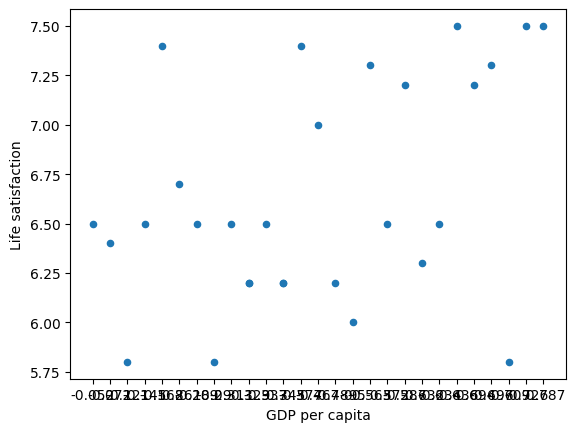

In [55]:
# Visualize the data

country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', )
plt.show()

In [56]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

In [57]:
# Train the model
model.fit(X, y)

LinearRegression()

In [58]:
# Make a prediction for Cyprus
X_new = [[22587]] # Cyprus' GDP per capita
print(model.predict(X_new))

[[-23873.90294079]]


In [59]:
# Replace Linear regression with k-Nearest Neighbors regression
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [60]:
# Train the model
model.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

In [61]:
# Make a prediction for Cyprus
X_new = [[22587]] # Cyprus' GDP per capita
print(model.predict(X_new))

[[6.23333333]]
